In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as numpy
import pandas as pd
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [3]:
import os

paths = []
labels = []

data_dir = '/content/drive/MyDrive/Data16'

print("Checking data directory contents:")
try:
    contents = os.listdir(data_dir)
    print(contents)
except Exception as e:
    print("Error occurred while checking directory contents:", e)

try:
    for dirname, _, filenames in os.walk(data_dir):
        print("Currently traversing directory:", dirname)
        for filename in filenames:
            print(os.path.join(dirname, filename))
            paths.append(os.path.join(dirname, filename))

            parts = filename.split('_')
            if len(parts) > 2:
                label = parts[-2]
            else:
                label = 'unknown'
            labels.append(label.lower())
except Exception as e:
    print("Error occurred during directory traversal:", e)

print('Dataset is loaded')


Checking data directory contents:
['OAF_metal25%', 'OAF_metal50%', 'OAF_metal75%']
Currently traversing directory: /content/drive/MyDrive/Data16
Currently traversing directory: /content/drive/MyDrive/Data16/OAF_metal25%
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (149).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (160).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (158).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (155).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (159).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (157).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (154).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (156).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (150).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (153).wav
/content/drive/MyDrive/Data16/OAF_metal25%/OAF_1_metal25%_1 (146).wav
/content/d

In [4]:
df = pd.DataFrame()
df['sound'] = paths
df['label'] = labels
df.head()

,sound,label
0,/content/drive/MyDrive/Data16/OAF_metal25%/OAF...,metal25%
1,/content/drive/MyDrive/Data16/OAF_metal25%/OAF...,metal25%
2,/content/drive/MyDrive/Data16/OAF_metal25%/OAF...,metal25%
3,/content/drive/MyDrive/Data16/OAF_metal25%/OAF...,metal25%
4,/content/drive/MyDrive/Data16/OAF_metal25%/OAF...,metal25%


In [5]:
df['label'].value_counts()

label
metal25%    480
metal50%    480
metal75%    480
Name: count, dtype: int64

<ipython-input-6-6da0c45ffbb4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set3')


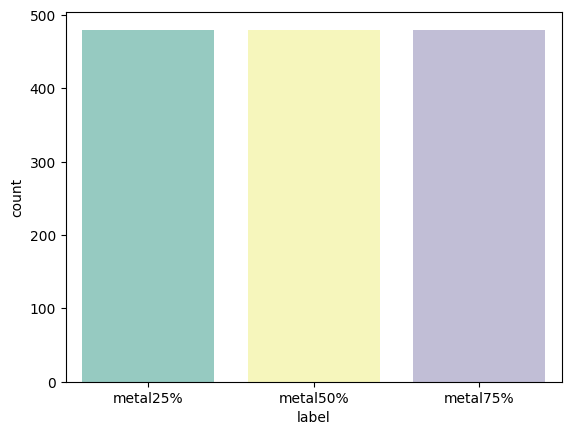

In [6]:
sns.countplot(data=df, x='label', palette='Set3')


plt.show()

In [12]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_audio_features(df, emotion):
    path = np.array(df['sound'][df['label'] == emotion])[0]
    data, sampling_rate = librosa.load(path)

    mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate)
    spectral_contrast = librosa.feature.spectral_contrast(y=data, sr=sampling_rate)
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate)

    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC - ' + emotion)

    plt.subplot(4, 1, 2)
    librosa.display.specshow(chroma, x_axis='time')
    plt.colorbar()
    plt.title('Chroma - ' + emotion)

    plt.subplot(4, 1, 3)
    librosa.display.specshow(spectral_contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast - ' + emotion)

    plt.subplot(4, 1, 4)
    librosa.display.specshow(librosa.amplitude_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Scaled Spectrogram - ' + emotion)

    plt.tight_layout()
    plt.show()


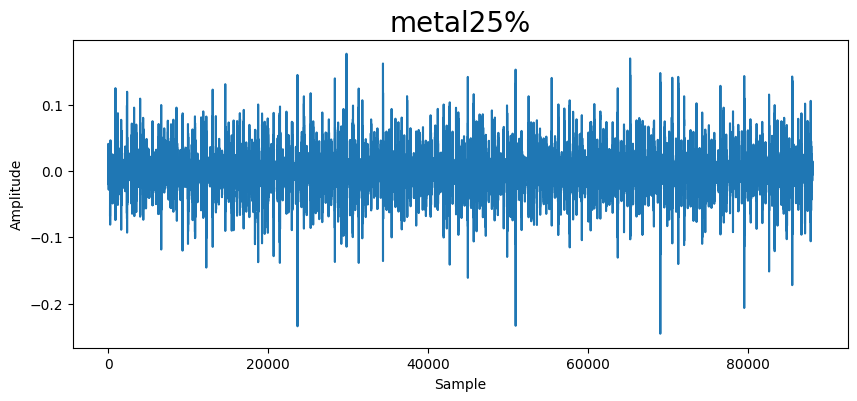

In [ ]:
emotion = 'metal25%'
path = np.array(df['sound'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 4))
plt.title(emotion, size=20)
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


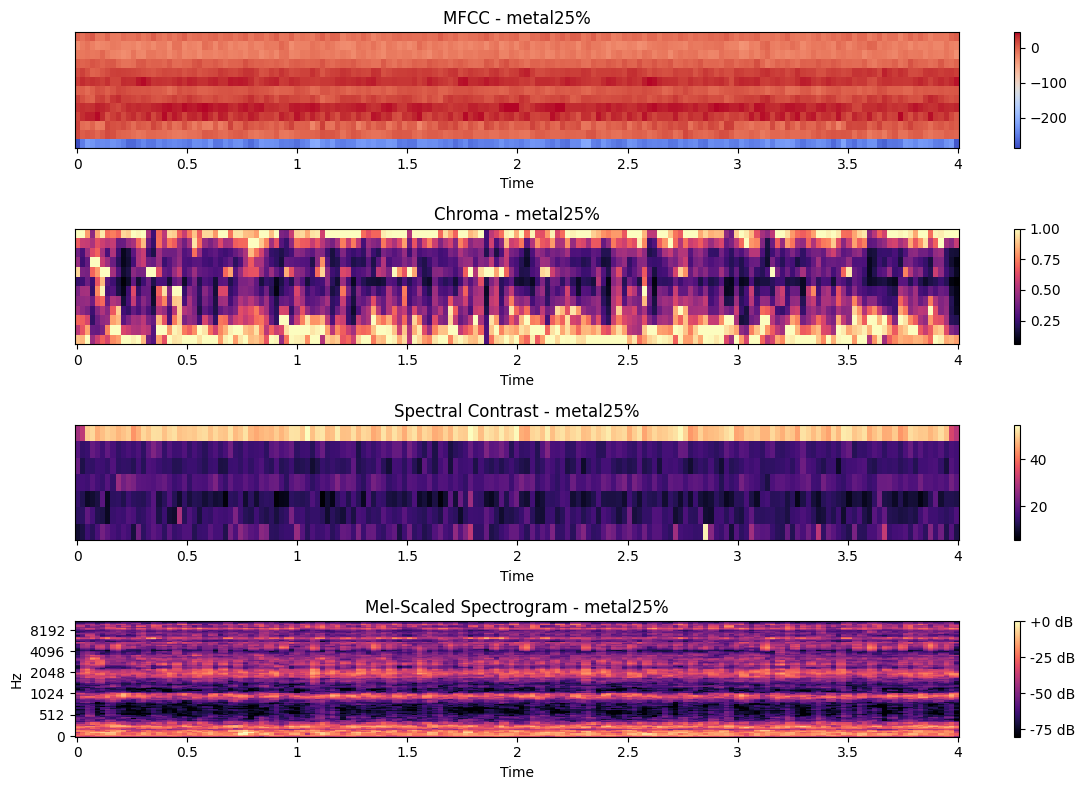

In [13]:
plot_audio_features(df, 'metal25%')

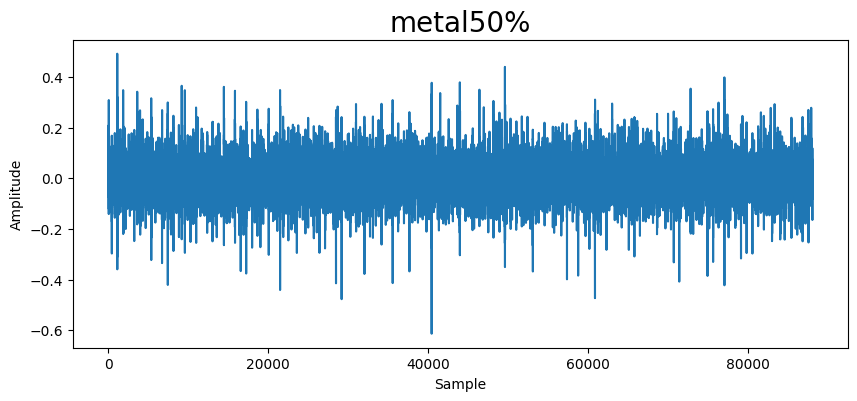

In [14]:
emotion = 'metal50%'
path = np.array(df['sound'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 4))
plt.title(emotion, size=20)
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


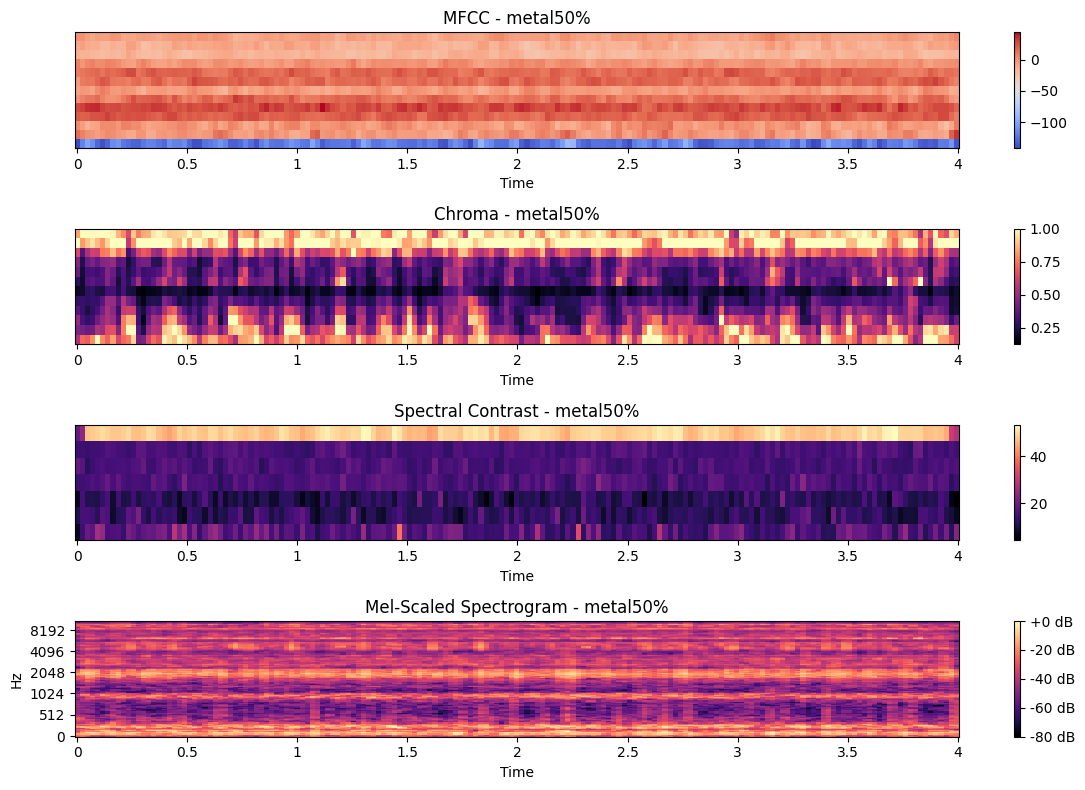

In [16]:
plot_audio_features(df, 'metal50%')

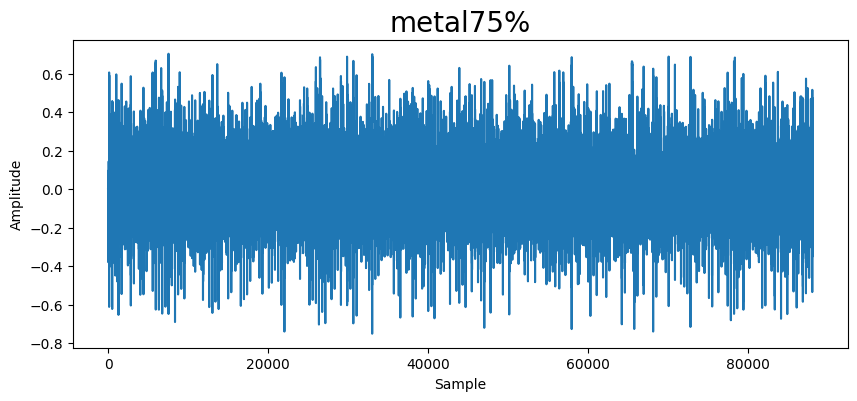

In [18]:
emotion = 'metal75%'
path = np.array(df['sound'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 4))
plt.title(emotion, size=20)
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


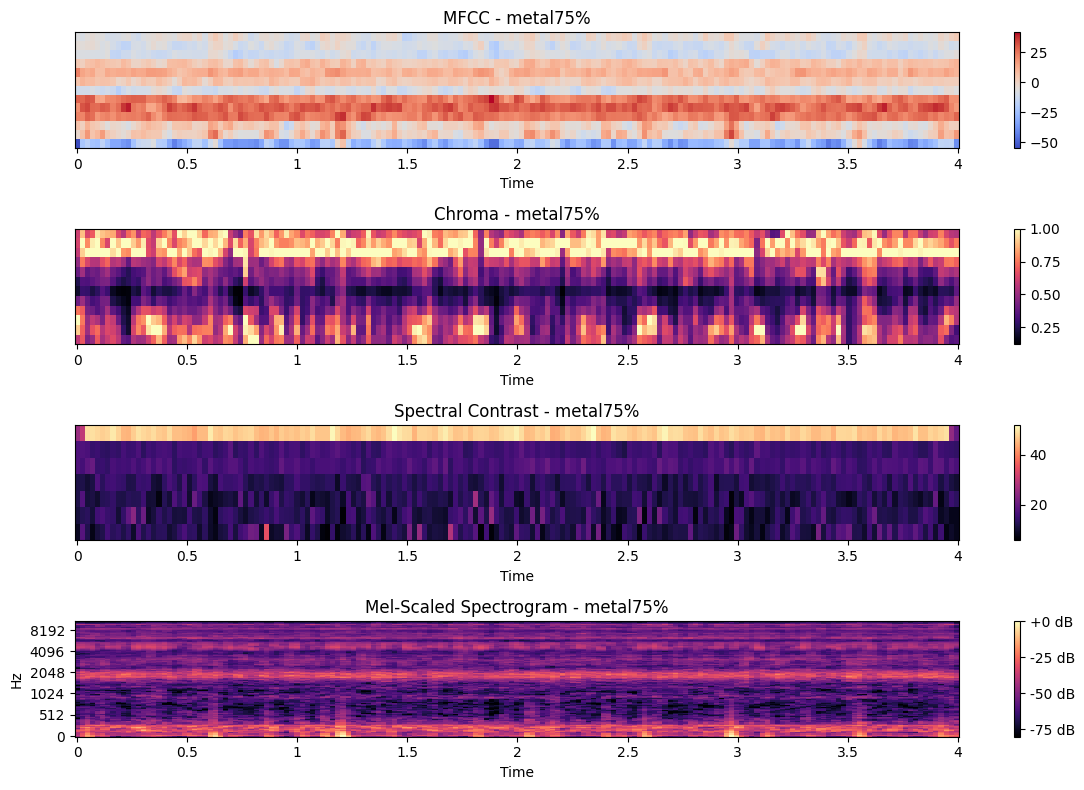

In [19]:
plot_audio_features(df, 'metal75%')

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename,duration=5, offset=0.5)
    mfcc= np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['sound'][0])

array([-241.35239   ,   -1.4999166 ,    2.4839082 ,   27.27386   ,
         33.8799    ,   16.489193  ,    5.3280077 ,   29.201916  ,
         21.005205  ,   -0.78798133,  -17.596579  ,  -17.959696  ,
         -7.8447742 ,   13.482271  ,   -6.9081855 ,    9.139462  ,
         -1.9716251 ,   -6.610013  ,  -18.442207  ,    4.450559  ,
         -1.4132434 ,   16.108011  ,   -2.9256766 ,    3.2685854 ,
         -1.9534642 ,   -6.313026  ,    2.05054   ,    9.297     ,
          1.9884539 ,    3.0424607 ,   -4.3520207 ,   -1.1958641 ,
         -5.924187  ,    1.3359565 ,   -3.0543942 ,   -2.4182472 ,
         -7.2244396 ,   -2.6307302 ,   -1.2839068 ,   -3.2765863 ],
      dtype=float32)

In [ ]:
x_mfcc= df['sound'].apply(lambda x: extract_mfcc(x))

In [ ]:
x_mfcc

0       [-241.35239, -1.4999166, 2.4839082, 27.27386, ...
1       [-241.35239, -1.4999166, 2.4839082, 27.27386, ...
2       [-241.35239, -1.4999166, 2.4839082, 27.27386, ...
3       [-241.35239, -1.4999166, 2.4839082, 27.27386, ...
4       [-241.35239, -1.4999166, 2.4839082, 27.27386, ...
                              ...                        
1435    [-30.306297, 1.965552, -2.678975, 25.061417, 2...
1436    [-30.306297, 1.965552, -2.678975, 25.061417, 2...
1437    [-30.306297, 1.965552, -2.678975, 25.061417, 2...
1438    [-30.306297, 1.965552, -2.678975, 25.061417, 2...
1439    [-30.306297, 1.965552, -2.678975, 25.061417, 2...
Name: sound, Length: 1440, dtype: object

In [ ]:
x= [x for x in x_mfcc]
x= np.array(x)
x.shape

(1440, 40)

In [ ]:
x= np.expand_dims(x, -1)
x.shape

(1440, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y= y.toarray()

In [ ]:
y.shape

(1440, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
num_classes = 3
model = Sequential([
   LSTM(128, return_sequences=False, input_shape=(40, 1)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 68787 (268.70 KB)
Trainable params: 6878

In [ ]:
history = model.fit(
    x,
    y,
    validation_split=0.5,
    epochs=50,
    batch_size=30,
    shuffle=True,
)


Epoch 1/50
24/24 [==============================] - 3s 104ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
24/24 [==============================] - 2s 73ms/step - loss: 0.0186 - accuracy: 0.9972 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
24/24 [==============================] - 1s 63ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
24/24 [==============================] - 2s 72ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
24/24 [==============================] - 2s 64ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
24/24 [==============================] - 2s 64ms/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
24/24 [==============================] - 2s 72ms/step - loss: 0.0173 - accuracy: 0.9889 - val_loss: 0.0000e+00 - val_a

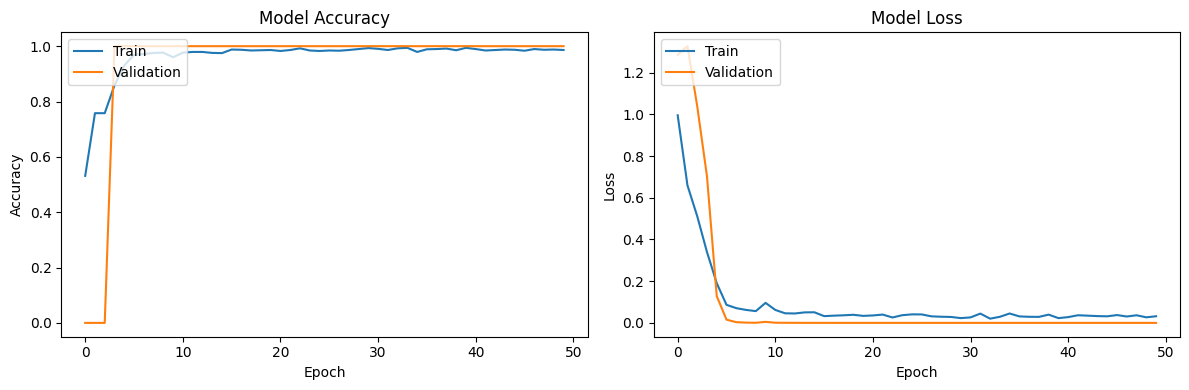

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()